# Итоговый проект "Прогнозирование конечных свойств новых материалов (композиционных материалов)"

Тема "Прогнозирование конечных свойств новых материалов (композиционных материалов)"


Актуальность:  
Созданные прогнозные модели помогут сократить количество проводимых испытаний, а также пополнить базу данных материалов возможными новыми характеристиками материалов, и цифровыми двойниками новых композитов.


На входе имеются данные о начальных свойствах компонентов композиционных материалов:
- Угол нашивки, град
- Шаг нашивки
- Плотность нашивки
- Соотношение матрица-наполнитель
- Плотность, кг/м3
- Модуль упругости, ГПа
- Количество отвердителя, м.%
- Содержание эпоксидных групп,%_2
- Температура вспышки, С_2
- Поверхностная плотность, г/м2
- Прочность при растяжении, МПа
- Потребление смолы, г/м2
- Модуль упругости при растяжении, ГПа


Задача:  
- Применить алгоритмы:
-- CatBoostRegressor
-- LinearRegression
-- SGDRegressor
-- RandomForestRegressor
-- DNN
-- MLPRegressor
-- GaussianProcessRegressor
- Выбрать лучшую модель.
- Применить ее в приложении.


Цель:  
Спрогнозировать ряд конечных свойств получаемых композиционных материалов  
За конечное свойство возьмем "Модуль упругости при растяжении, ГПа"

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Основная-информация" data-toc-modified-id="Основная-информация-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Основная информация</a></span></li><li><span><a href="#Предобработка-данных-и-исследование" data-toc-modified-id="Предобработка-данных-и-исследование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных и исследование</a></span><ul class="toc-item"><li><span><a href="#Пропущенные-значения" data-toc-modified-id="Пропущенные-значения-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Пропущенные значения</a></span></li><li><span><a href="#Дубли" data-toc-modified-id="Дубли-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Дубли</a></span></li><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Исследование данных</a></span></li><li><span><a href="#Выбросы" data-toc-modified-id="Выбросы-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выбросы</a></span></li><li><span><a href="#Метрики-и-визуализации" data-toc-modified-id="Метрики-и-визуализации-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Метрики и визуализации</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Моделирование" data-toc-modified-id="Моделирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Моделирование</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#SGDRegressor" data-toc-modified-id="SGDRegressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>SGDRegressor</a></span></li><li><span><a href="#GaussianProcessRegressor" data-toc-modified-id="GaussianProcessRegressor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>GaussianProcessRegressor</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#MLPR---Multi-layer-Perceptron-regressor" data-toc-modified-id="MLPR---Multi-layer-Perceptron-regressor-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>MLPR - Multi-layer Perceptron regressor</a></span></li><li><span><a href="#Keras-model-neiron" data-toc-modified-id="Keras-model-neiron-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Keras model neiron</a></span></li><li><span><a href="#Catboost" data-toc-modified-id="Catboost-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Catboost</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Импорт библиотек

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared, WhiteKernel, RBF

import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.optimizers import Adam

import catboost
from catboost import CatBoostRegressor

import pickle

%matplotlib inline

In [2]:
!pip freeze > requirements.txt

## Основная информация

Подгрузим необходимые данные, индексами сделаем колонку `Unnamed: 0`, мы ее заранее проверили на уникальноть значений.

In [3]:
df_1 = pd.read_excel('files/X_nup.xlsx', index_col='Unnamed: 0')
df_2 = pd.read_excel('files/X_bp.xlsx', index_col='Unnamed: 0')

Выведим первые 5 строк полученных датафреймом

In [4]:
df_1.tail()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
1035                  90     8.088111          47.759177
1036                  90     7.619138          66.931932
1037                  90     9.800926          72.858286
1038                  90    10.079859          65.519479
1039                  90     9.021043          66.920143

In [5]:
df_2.tail()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
1018                    2387.292495               125.007669  
1019                    2360.392784               117.730099  
1020                    2662.906040               236.606764  
1021                    2071.715856               197.126067  
1022                    2856.328932               194.754342

Согласно условию задания, нам необходимо объединить датафреймы по индексу

In [6]:
df = df_1.join(df_2, how='inner')

Выведим полученный результат

In [7]:
df.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
0                   0          4.0               57.0   
1                   0          4.0               60.0   
2                   0          4.0               70.0   
3                   0          5.0               47.0   
4                   0          5.0               57.0   

   Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [8]:
df.tail()

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
1018                  90     9.076380          47.019770   
1019                  90    10.565614          53.750790   
1020                  90     4.161154          67.629684   
1021                  90     6.313201          58.261074   
1022                  90     6.078902          77.434468   

      Соотношение матрица-наполнитель  Плотность, кг/м3  \
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
1018                    2387.292495               125.007669  
1019                    2360.392784               117.730099  
1020                    2662.906040               236.606764  
1021                    2071.715856               197.126067  
1022                    2856.328932               194.754342

Приведем названия столбцов в единый стиль. Поменяем в названии колонки регистр первой буквы.

In [9]:
df = df.rename(columns={'модуль упругости, ГПа': 'Модуль упругости, ГПа'})

Выведим размер датафрейма

In [10]:
df.shape

(1023, 13)

Общая информация по датафрейму

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1023 non-null   int64  
 1   Шаг нашивки                           1023 non-null   float64
 2   Плотность нашивки                     1023 non-null   float64
 3   Соотношение матрица-наполнитель       1023 non-null   float64
 4   Плотность, кг/м3                      1023 non-null   float64
 5   Модуль упругости, ГПа                 1023 non-null   float64
 6   Количество отвердителя, м.%           1023 non-null   float64
 7   Содержание эпоксидных групп,%_2       1023 non-null   float64
 8   Температура вспышки, С_2              1023 non-null   float64
 9   Поверхностная плотность, г/м2         1023 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1023 non-null   float64
 11  Прочность при рас

Рабочий датафрейм состоит 13 признаков и 1023 наблюдений.

## Предобработка данных и исследование

### Пропущенные значения

Проверим пропущенные значения

In [12]:
df.isna().sum()

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
Модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

Пропущенные значения отсутствуют

### Дубли

Проверим датафрейм на дубликаты

In [13]:
df.duplicated().sum()

0

Дубликаты не обнаружены

### Исследование данных

Выведим основные параметры признаков в транспонированном виде

In [14]:
df.describe().T

count         mean         std  \
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
Модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   

                                              min          25%          50%  \
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
Модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   

                                              75%          max  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
Модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628

Построим boxplot для каждого признака, для обнаружения выбросов


Угол нашивки, град



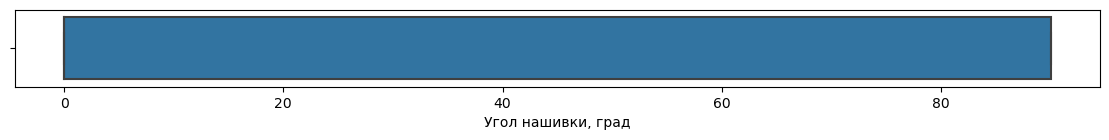

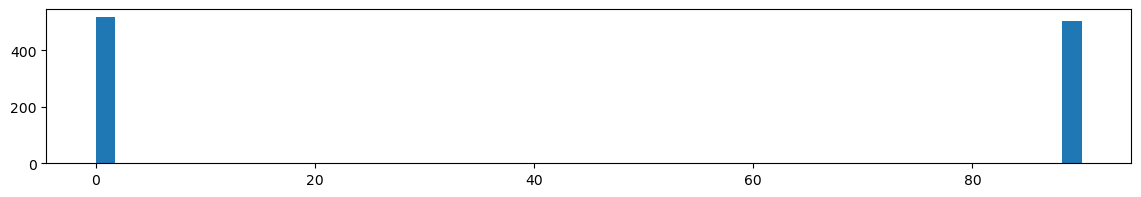


Шаг нашивки



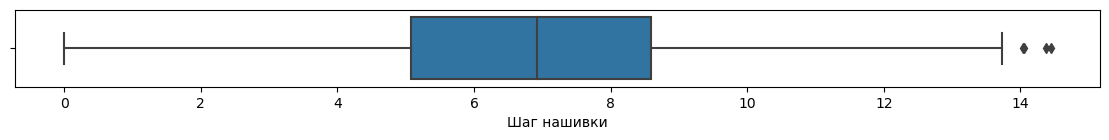

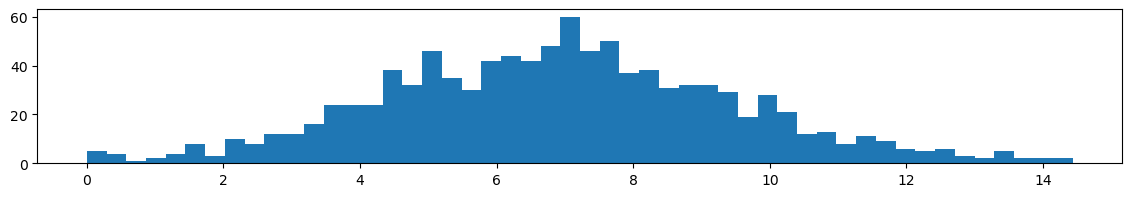


Плотность нашивки



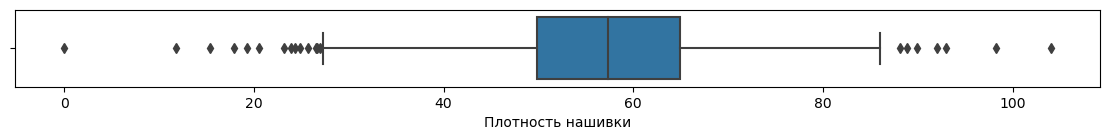

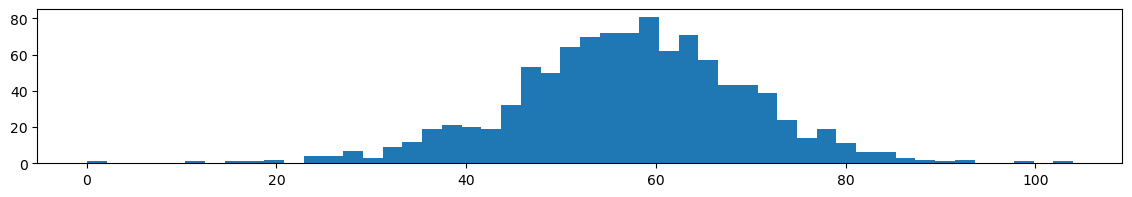


Соотношение матрица-наполнитель



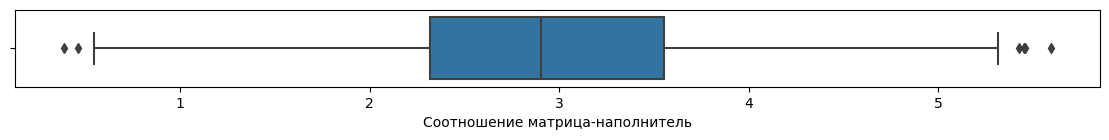

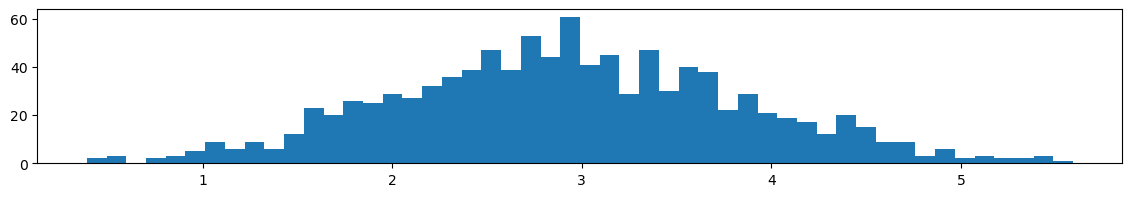


Плотность, кг/м3



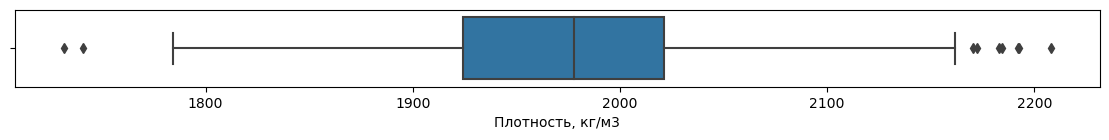

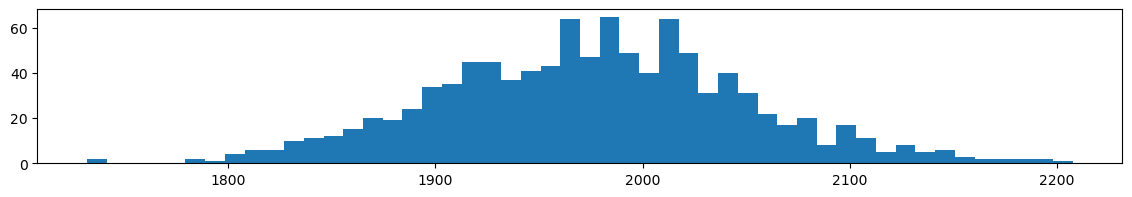


Модуль упругости, ГПа



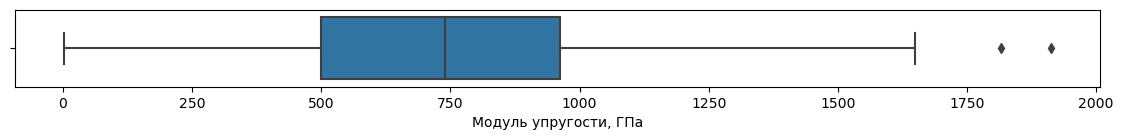

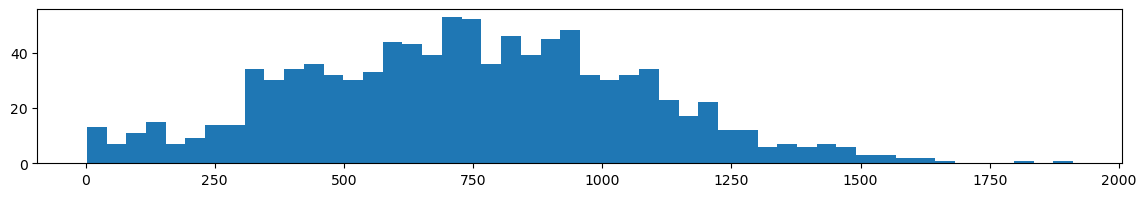


Количество отвердителя, м.%



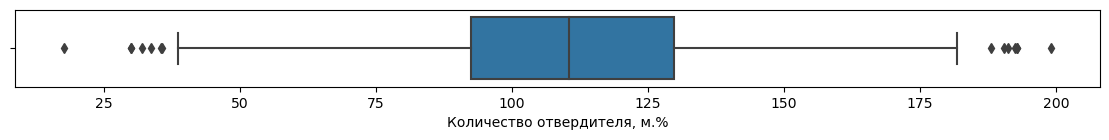

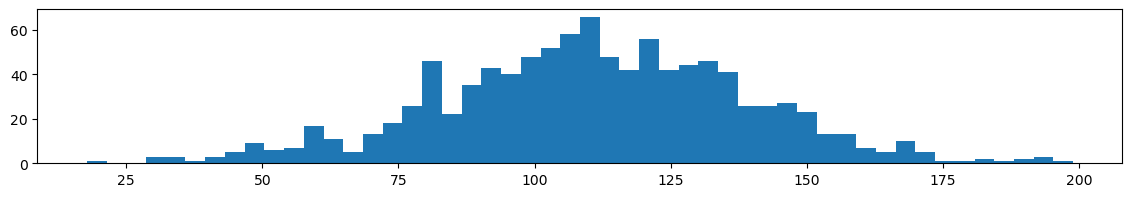


Содержание эпоксидных групп,%_2



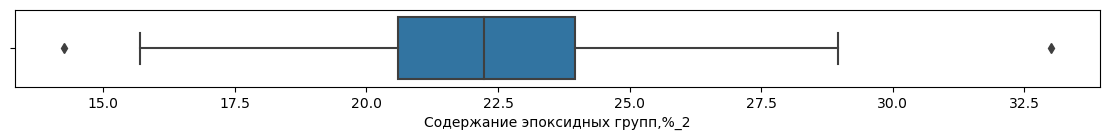

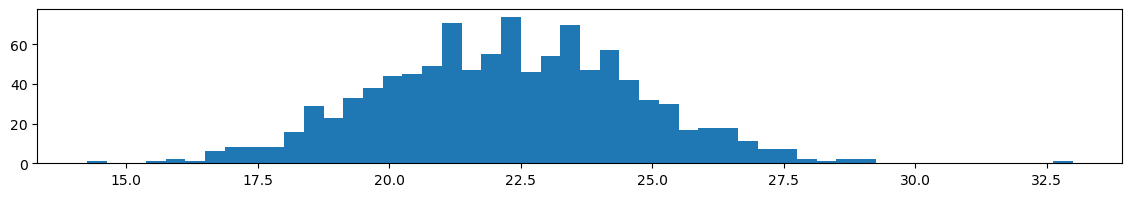


Температура вспышки, С_2



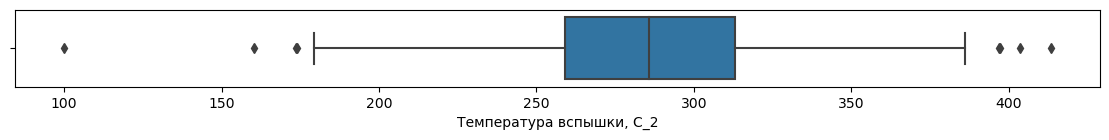

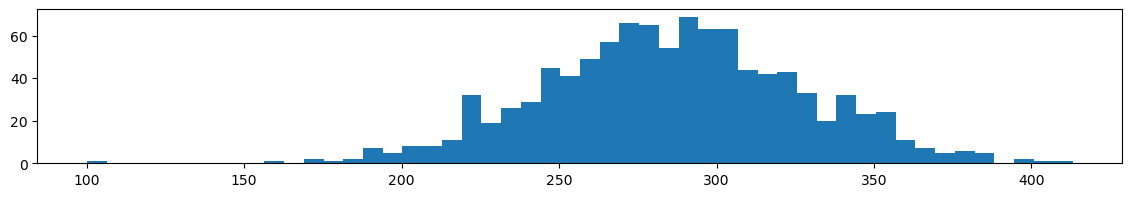


Поверхностная плотность, г/м2



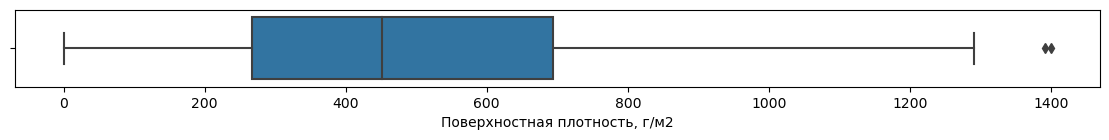

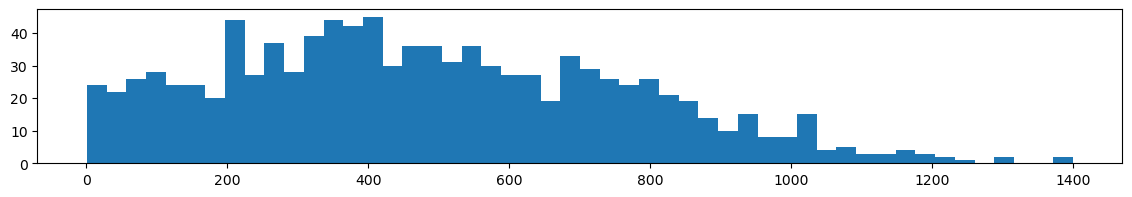


Модуль упругости при растяжении, ГПа



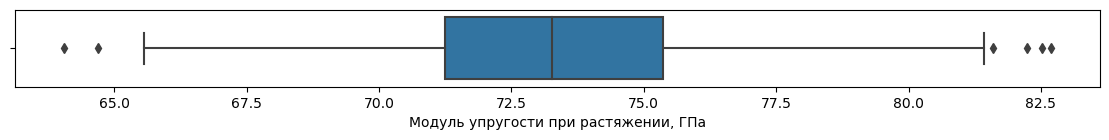

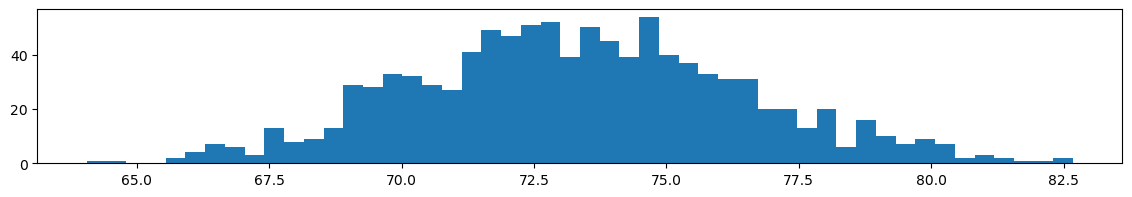


Прочность при растяжении, МПа



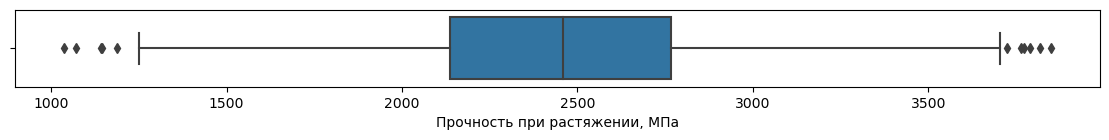

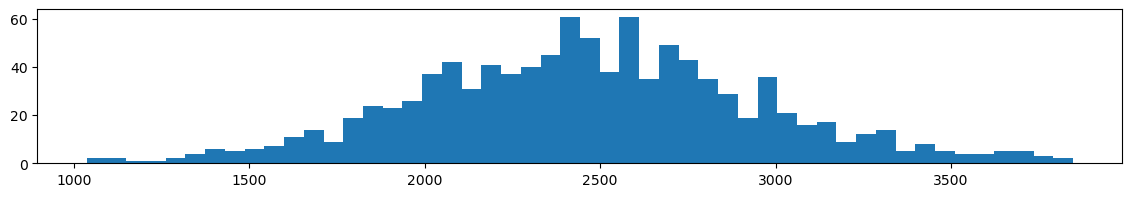


Потребление смолы, г/м2



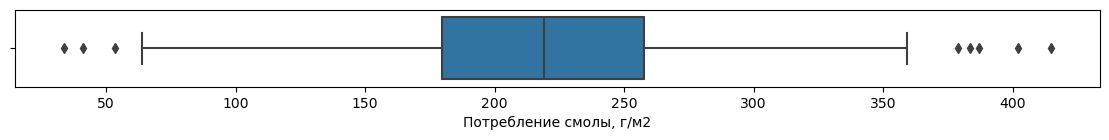

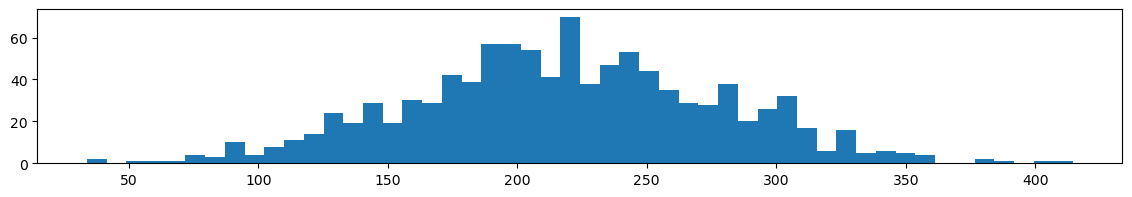

In [15]:
columns = list(df.columns)

for col in columns:
    print()
    print(col, )
    print()
    plt.figure(figsize=(14, 1))
    
    sns.boxplot(x=df[col])
    plt.figure(figsize=(14, 2))
    plt.hist(x=df[col], bins=50)
    plt.show()

Из данных, мы можем предположить, что есть в ряде случаев выбросы. Учтем это в дальнейшей работе.

Выведим корреляцию признаков

In [16]:
df.corr(method='pearson')

Угол нашивки, град  Шаг нашивки  \
Угол нашивки, град                              1.000000     0.023616   
Шаг нашивки                                     0.023616     1.000000   
Плотность нашивки                               0.107947     0.003487   
Соотношение матрица-наполнитель                -0.031073     0.036437   
Плотность, кг/м3                               -0.068474    -0.061015   
Модуль упругости, ГПа                          -0.025417    -0.009875   
Количество отвердителя, м.%                     0.038570     0.014887   
Содержание эпоксидных групп,%_2                 0.008052     0.003022   
Температура вспышки, С_2                        0.020695     0.025795   
Поверхностная плотность, г/м2                   0.052299     0.038332   
Модуль упругости при растяжении, ГПа            0.023003    -0.029468   
Прочность при растяжении, МПа                   0.023398    -0.059547   
Потребление смолы, г/м2                        -0.015334     0.013394   

                                      Плотность нашивки  \
Угол нашивки, град                             0.107947   
Шаг нашивки                                    0.003487   
Плотность нашивки                              1.000000   
Соотношение матрица-наполнитель               -0.004652   
Плотность, кг/м3                               0.080304   
Модуль упругости, ГПа                          0.056346   
Количество отвердителя, м.%                    0.017248   
Содержание эпоксидных групп,%_2               -0.039073   
Температура вспышки, С_2                       0.011391   
Поверхностная плотность, г/м2                 -0.049923   
Модуль упругости при растяжении, ГПа           0.006476   
Прочность при растяжении, МПа                  0.019604   
Потребление смолы, г/м2                        0.012239   

                                      Соотношение матрица-наполнитель  \
Угол нашивки, град                                          -0.031073   
Шаг нашивки                                                  0.036437   
Плотность нашивки                                           -0.004652   
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.003841   
Модуль упругости, ГПа                                        0.031700   
Количество отвердителя, м.%                                 -0.006445   
Содержание эпоксидных групп,%_2                              0.019766   
Температура вспышки, С_2                                    -0.004776   
Поверхностная плотность, г/м2                               -0.006272   
Модуль упругости при растяжении, ГПа                        -0.008411   
Прочность при растяжении, МПа                                0.024148   
Потребление смолы, г/м2                                      0.072531   

                                      Плотность, кг/м3  Модуль упругости, ГПа  \
Угол нашивки, град                           -0.068474              -0.025417   
Шаг нашивки                                  -0.061015              -0.009875   
Плотность нашивки                             0.080304               0.056346   
Соотношение матрица-наполнитель               0.003841               0.031700   
Плотность, кг/м3                              1.000000              -0.009647   
Модуль упругости, ГПа                        -0.009647               1.000000   
Количество отвердителя, м.%                  -0.035911               0.024049   
Содержание эпоксидных групп,%_2              -0.008278              -0.006804   
Температура вспышки, С_2                     -0.020695               0.031174   
Поверхностная плотность, г/м2                 0.044930              -0.005306   
Модуль упругости при растяжении, ГПа         -0.017602               0.023267   
Прочность при растяжении, МПа                -0.069981               0.041868   
Потребление смолы, г/м2                      -0.015937               0.001840   

                              

Визуализируем корреляцию

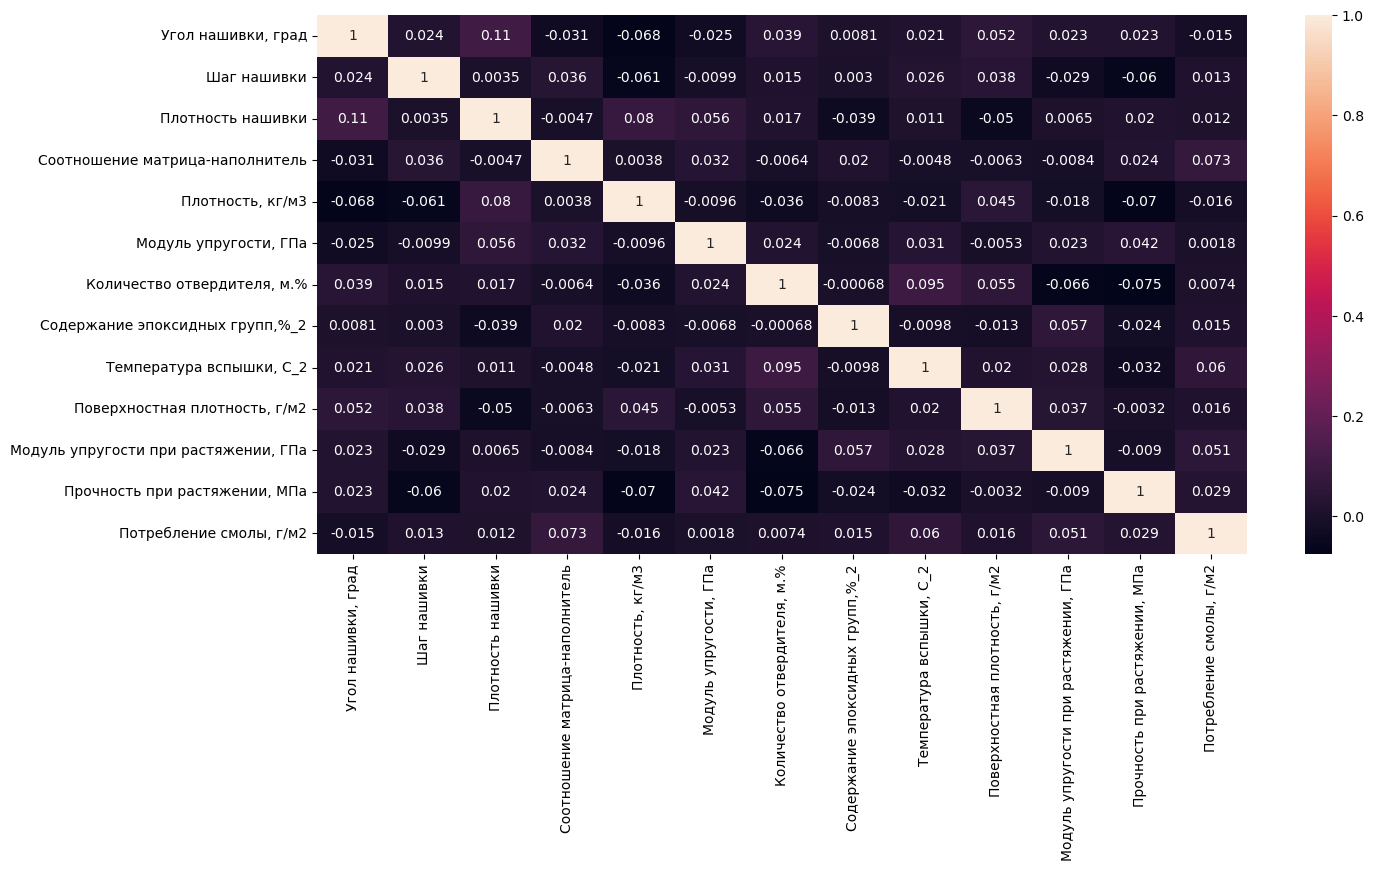

In [17]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(method='pearson'), annot=True);

Построим график с попарными взаимосвязями

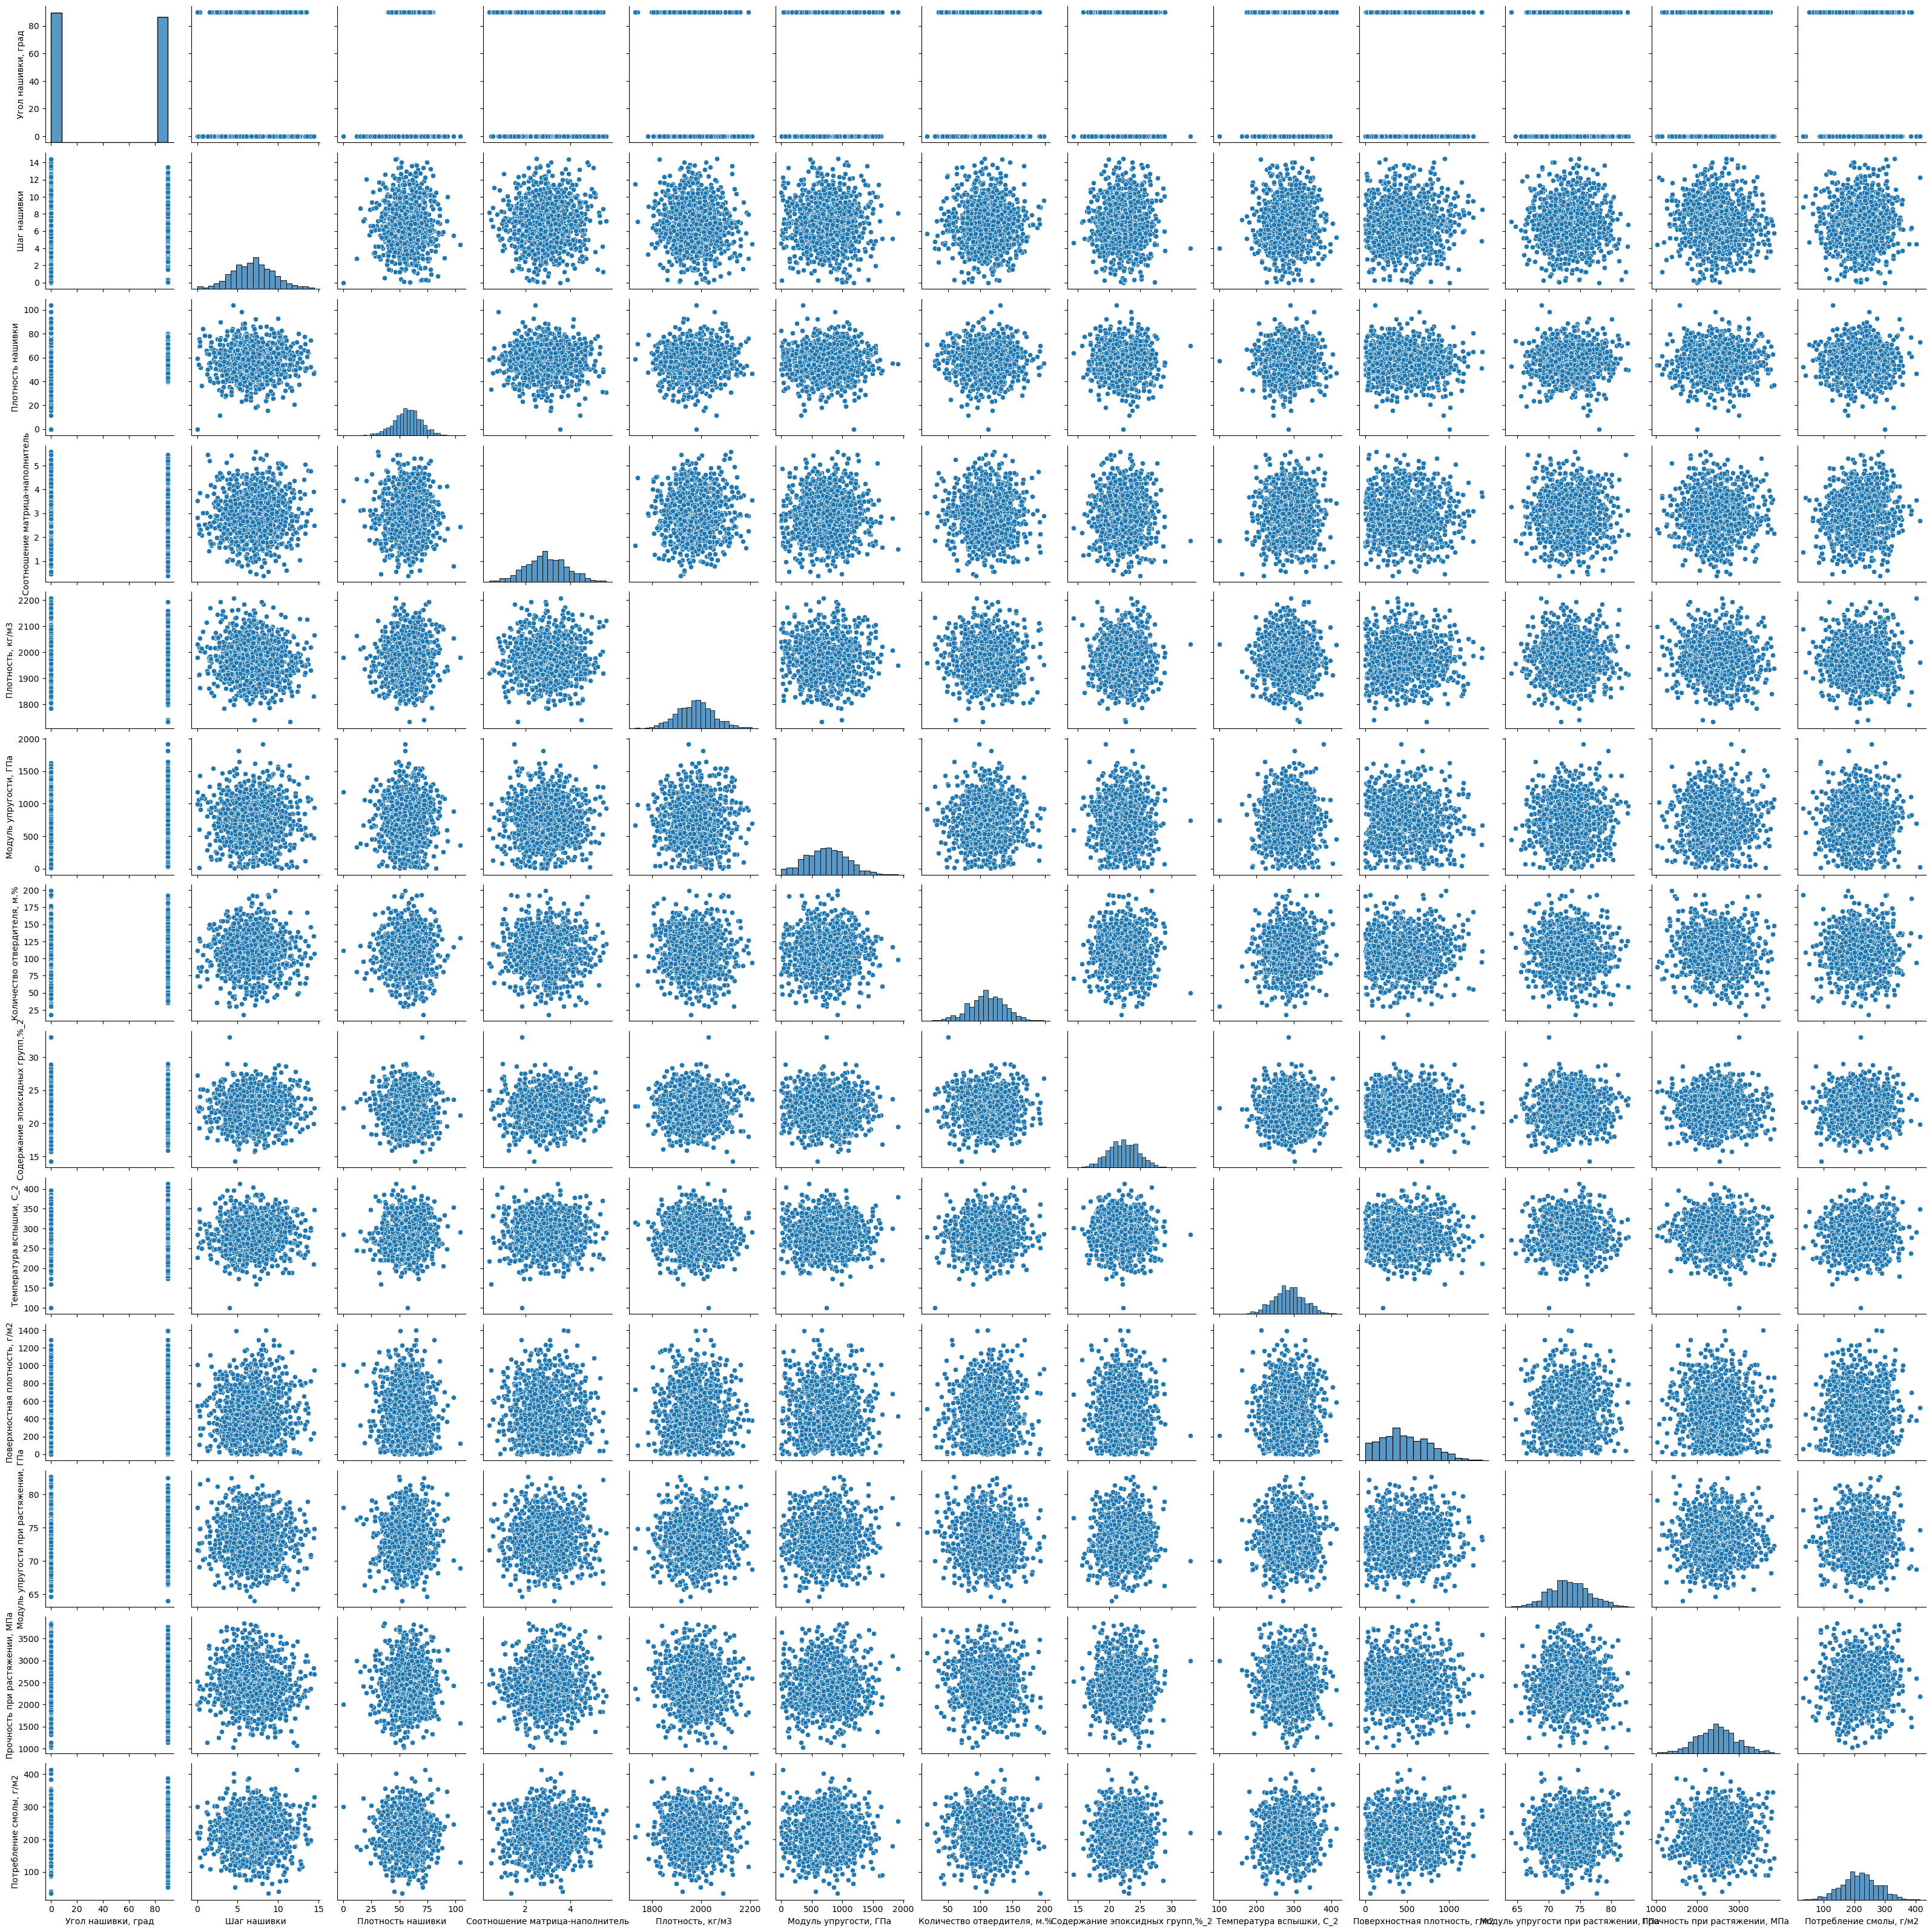

In [18]:
sns.pairplot(df);

Явная корреляция между признаками отсутствует.

### Выбросы

Подготовим датафрейм без выбросов

Будем использовать межквартильный диапазон IQR.

Создадим для этого функцию

In [19]:
def percent(df=df, coef=1.5):
    
    list_index = []
    
    for column in df.columns:
        Q1 = np.percentile(df[column], 25)

        Q3 = np.percentile(df[column], 75)
        
        IQR = Q3 - Q1
        
        upper = np.where(df[column] >= (Q3 + coef * IQR))
        lower = np.where(df[column] <= (Q1 - coef * IQR))
        
        list_index.append(list(upper[0]))
        list_index.append(list(lower[0]))
        
    return set(np.concatenate(list_index))

Посчитаем количество наблюдений которое нужно будет убрать и %

In [20]:
print(len(percent()))
print(f'Выбросов - {round(len(percent()) / df.shape[0] * 100, 2)}%')

87
Выбросов - 8.5%


В целом, можно сказать, что количество менее 10% это допустимо.

Создадим новый датафрейм без выбросов `df_without_emissions`

In [21]:
df_without_emissions = df.drop(percent())

Выведим размерность

In [22]:
df_without_emissions.shape

(936, 13)

Проверим полученный результат визуализацией нового датафрейма


Угол нашивки, град



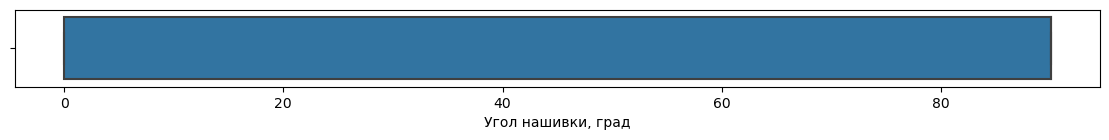

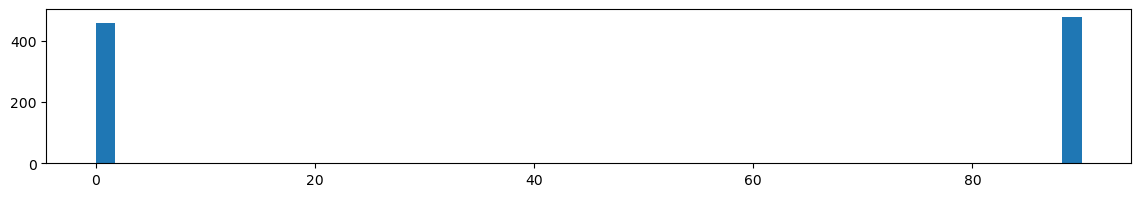


Шаг нашивки



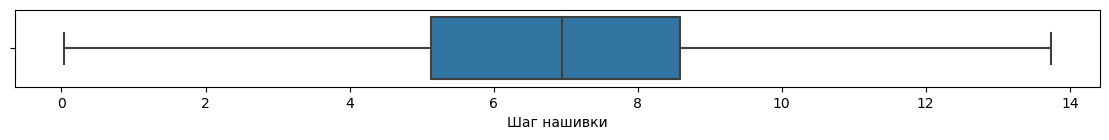

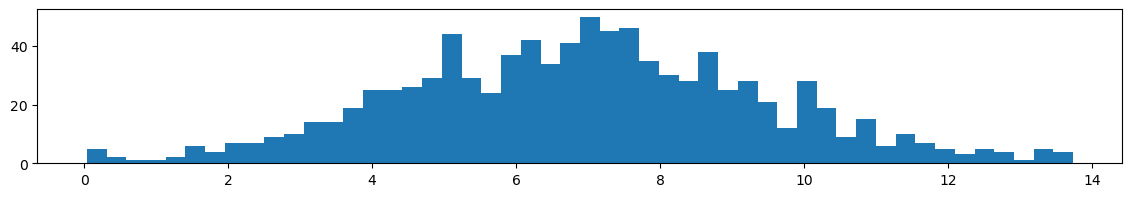


Плотность нашивки



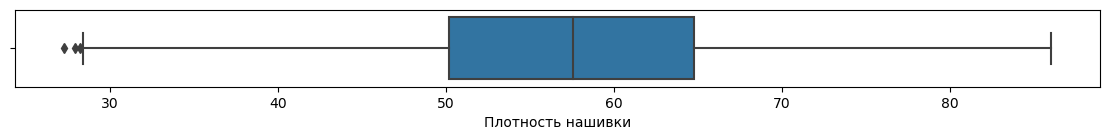

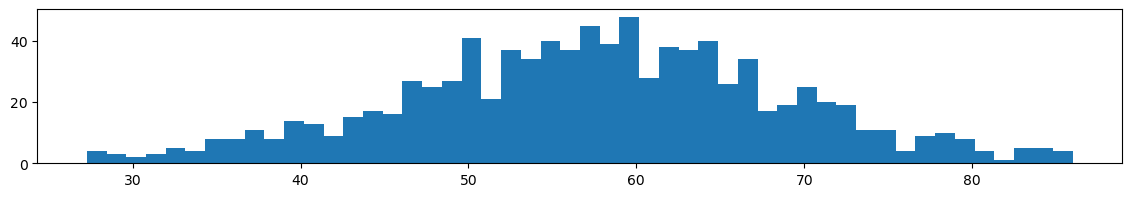


Соотношение матрица-наполнитель



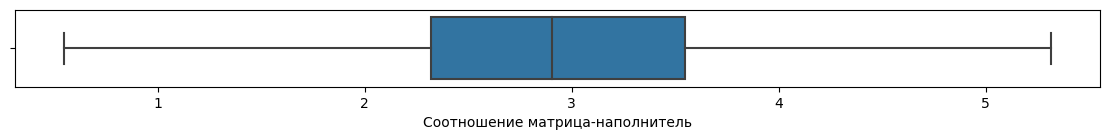

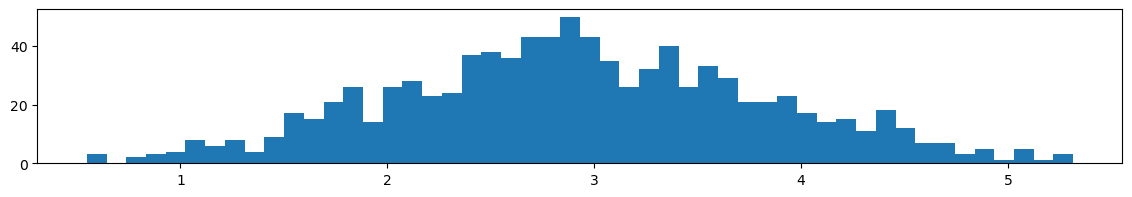


Плотность, кг/м3



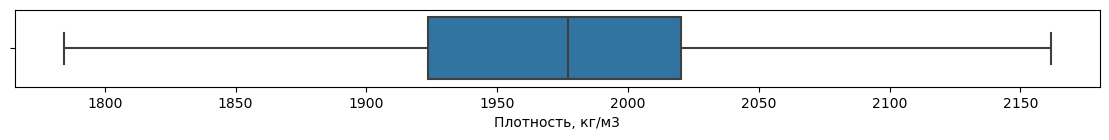

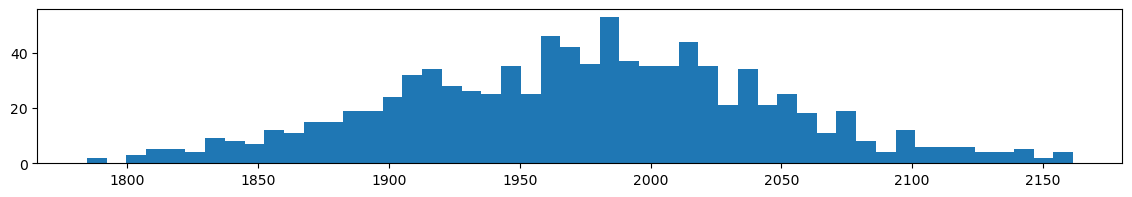


Модуль упругости, ГПа



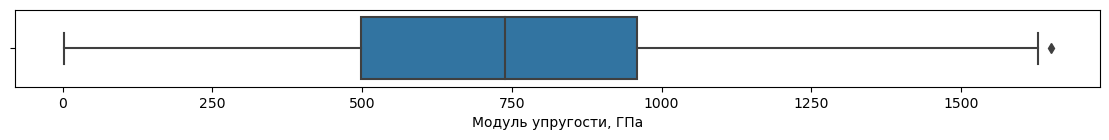

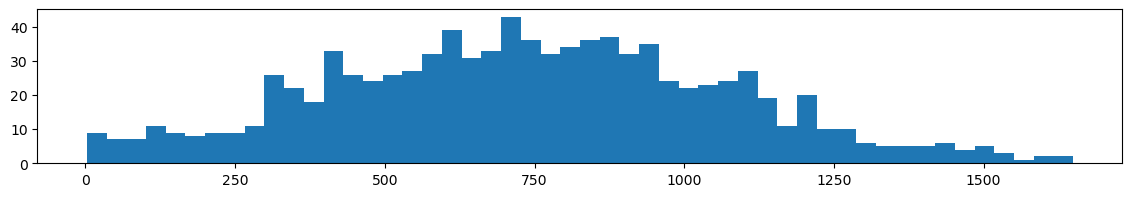


Количество отвердителя, м.%



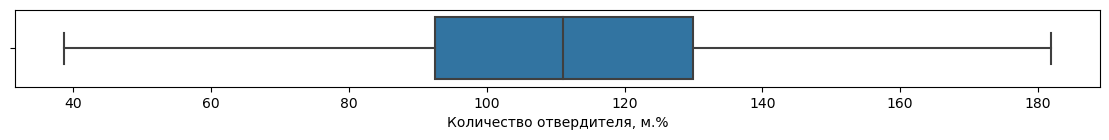

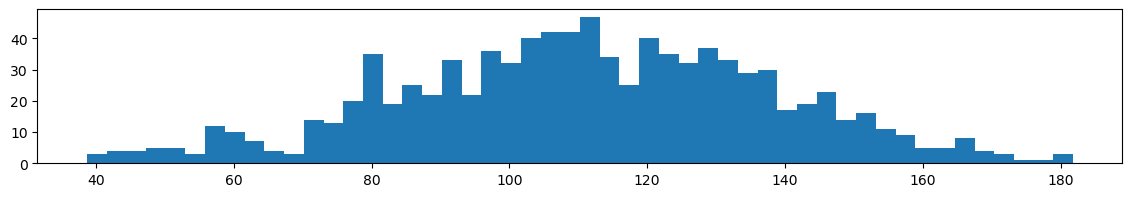


Содержание эпоксидных групп,%_2



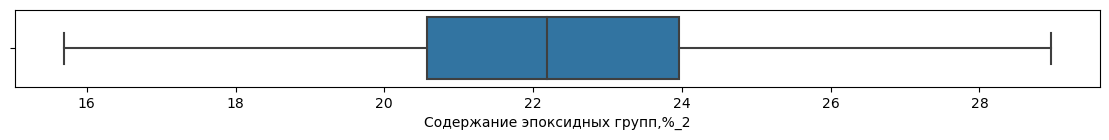

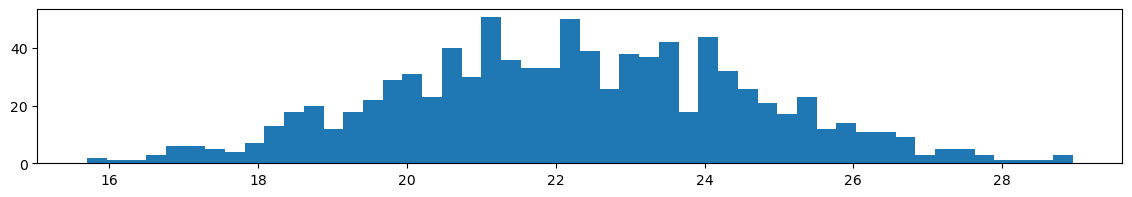


Температура вспышки, С_2



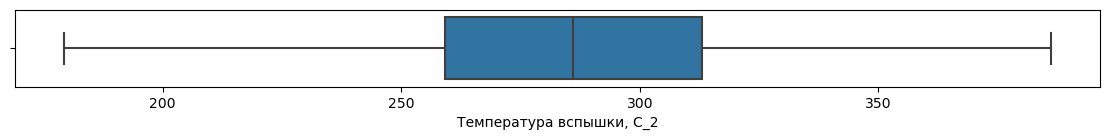

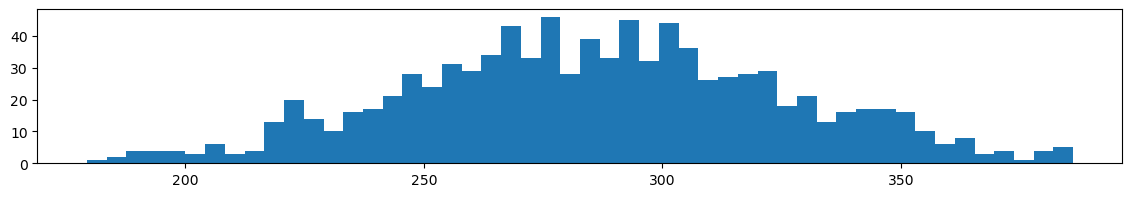


Поверхностная плотность, г/м2



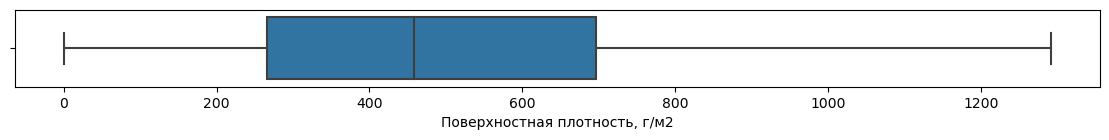

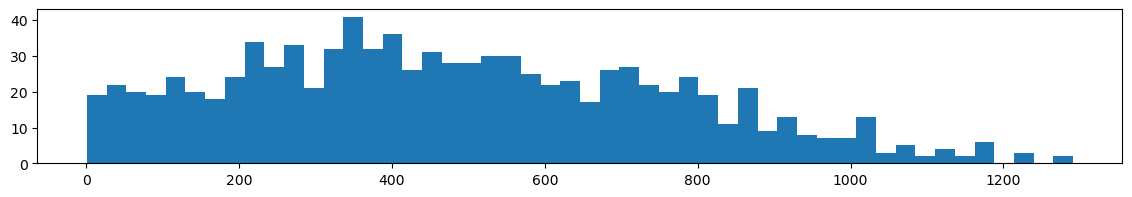


Модуль упругости при растяжении, ГПа



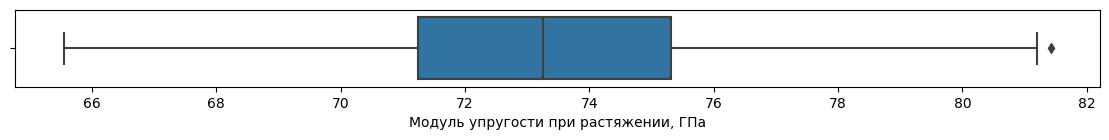

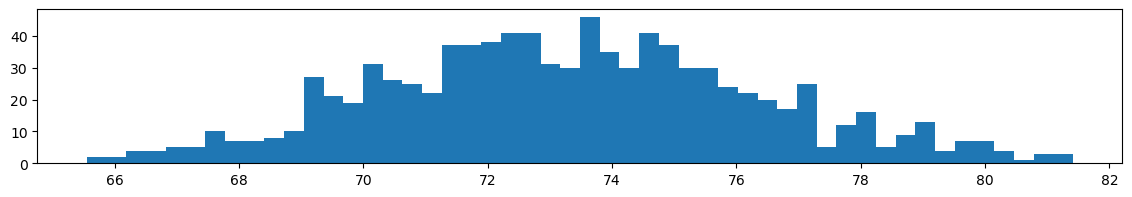


Прочность при растяжении, МПа



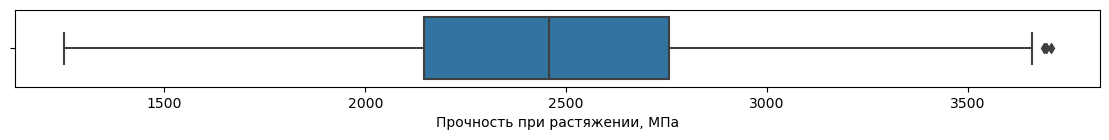

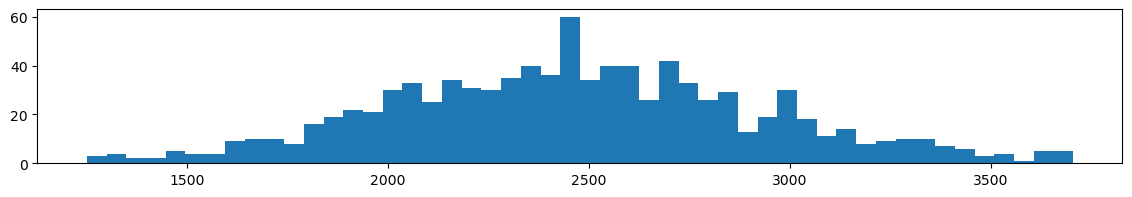


Потребление смолы, г/м2



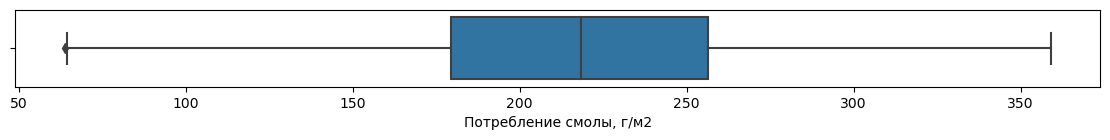

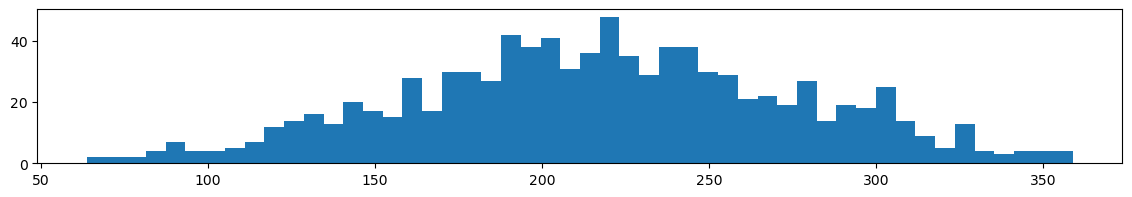

In [23]:
for col in columns:
    print()
    print(col, )
    print()
    plt.figure(figsize=(14, 1))
    
    sns.boxplot(x=df_without_emissions[col])
    plt.figure(figsize=(14, 2))
    plt.hist(x=df_without_emissions[col], bins=50)
    plt.show()

Отличный результат

### Метрики и визуализации

Создадим словарь в который будем добавлять метрики по каждой модели

In [24]:
dict_metric = {}

#выделим список метрик
metric_col = ['RMSE, Корень из среднеквадратичной ошибки', 'MAE, Средняя абсолютная ошибка', 'MAPE, Средняя абсолютная ошибка в процентах', 'R2, Коэффициент детерминации', 'EVS, Балл объясненной дисперсии регрессии', ]

Создадим функцию с метрикой `mape` - средняя абсолютная ошибка в процентах

In [25]:
def mape_metric(y_true, y_pred):
    y_error = y_true - y_pred
    y_error_abs = [abs(i) for i in y_error]
    perc_error_abs = y_error_abs / y_true
    mape_res = perc_error_abs.sum() / len(y_true) * 100
    return mape_res

Создадим функцию вывода основных метрик и добавления метрик в словарь с метриками

In [26]:
def metriki(y_test, y_pred, name_model):
    """Функция определения эффективности моделей по 4 метрикам и добавления показателей в словарь"""
    
    print(f'Модель - {name_model}')
    print()
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mape_metric(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)

    
    dict_metric[name_model] = [rmse, mae, mape, r2, evs]
    
    print(f'RMSE, Корень из среднеквадратичной ошибки: {rmse}')
    print(f'MAE, Средняя абсолютная ошибка: {mae}')
    print(f'MAPE, Средняя абсолютная ошибка в процентах: {mape}')
    print(f'R2, Коэффициент детерминации: {r2}')
    print(f'EVS, Балл объясненной дисперсии регрессии: {evs}')

Создадим функцию визуализации ошибок нейронных сетей keras

In [27]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

Создадим функцию визуализации целевых и прогнозных значений

In [28]:
def visual(y_test, y_pred):
    plt.figure(figsize=(13, 4))
    plt.grid()
    plt.plot(np.array(y_test)[:100], label='Целевые')
    plt.plot(np.array(y_pred)[:100], label='Прогнозные')
    plt.legend()

### Выводы

Мы успешно исследовали данные на пропущенные значения, дубли, корреляцию между признаками.  
Пропущенные значения и дубли отсутствуют. Явная корреляция между признаками отсутствует.  
Удалили выбросы, подготовили датафреймы без выбросов.  
Подготовили необходимые метрики и визуализации.

## Моделирование

Подготовим данные для моделей. Для этого используем датафрейм без выбросов.

Целевой признак определим за показатель `Модуль упругости при растяжении, ГПа`

In [29]:
X_1_df_clean = df_without_emissions.drop('Модуль упругости при растяжении, ГПа', axis=1).copy()
y_1_df_clean = df_without_emissions['Модуль упругости при растяжении, ГПа'].copy()

Разделим датафрейм на тренировочную и тестовую выборки

In [30]:
X_1_clean_train, X_1_clean_test, y_1_clean_train, y_1_clean_test = train_test_split(X_1_df_clean, y_1_df_clean, test_size=.2, shuffle=False)

Стандартизируем данные методом `StandardScaler`

In [31]:
scaler = StandardScaler()

X_1_clean_train_sc = scaler.fit_transform(X_1_clean_train)
X_1_clean_test_sc = scaler.fit_transform(X_1_clean_test)

### LinearRegression

Обучим модель `LinearRegression`

In [32]:
lin_reg_1_model = LinearRegression()
history = lin_reg_1_model.fit(X_1_clean_train_sc, y_1_clean_train)

Прогнозные показатели

In [33]:
y_pred_lin_reg_1 = lin_reg_1_model.predict(X_1_clean_test_sc)

Выведим метрики модели

In [34]:
metriki(y_1_clean_test, y_pred_lin_reg_1, 'LinearRegression')

Модель - LinearRegression

RMSE, Корень из среднеквадратичной ошибки: 2.889215969582389
MAE, Средняя абсолютная ошибка: 2.352504215715446
MAPE, Средняя абсолютная ошибка в процентах: 3.2187946338362674
R2, Коэффициент детерминации: 0.014765133773159467
EVS, Балл объясненной дисперсии регрессии: 0.015088238305682178


Визуализируем прогнозные и тестовые целевые значения

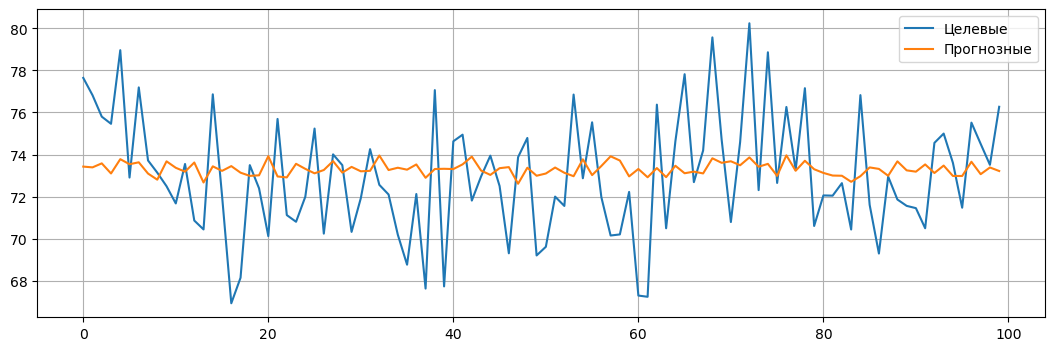

In [35]:
visual(y_1_clean_test, y_pred_lin_reg_1)

Мы успешно применили алгоритм `LinearRegression`

### SGDRegressor

Обучим модель `SGDRegressor`

In [36]:
sgdr_1_model = SGDRegressor()
sgdr_1_model.fit(X_1_clean_train_sc, y_1_clean_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Прогнозные значения

In [37]:
y_pred_sgdr_1 = sgdr_1_model.predict(X_1_clean_test_sc)

Выведим метрики модели

In [38]:
metriki(y_1_clean_test, y_pred_sgdr_1, 'SGDRegressor')

Модель - SGDRegressor

RMSE, Корень из среднеквадратичной ошибки: 2.8904287927678753
MAE, Средняя абсолютная ошибка: 2.3515312658101246
MAPE, Средняя абсолютная ошибка в процентах: 3.217631650200972
R2, Коэффициент детерминации: 0.013937804490830485
EVS, Балл объясненной дисперсии регрессии: 0.014335206915030652


Визуализируем прогнозные и тестовые целевые значения

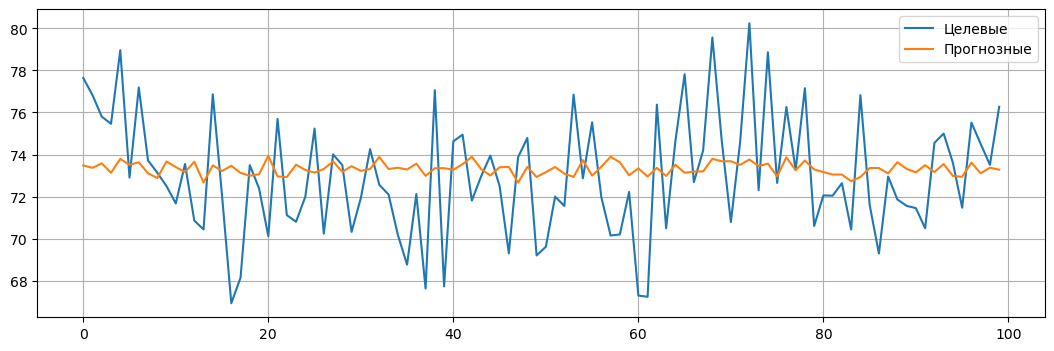

In [39]:
visual(y_1_clean_test, y_pred_sgdr_1)

Мы успешно применили алгоритм `SGDRegressor`

### GaussianProcessRegressor

Обучим модель `GaussianProcessRegressor`

In [40]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gpr_1_model = GaussianProcessRegressor(kernel=kernel, alpha=3, n_restarts_optimizer=2)
gpr_1_model.fit(X_1_clean_train_sc, y_1_clean_train)

GaussianProcessRegressor(alpha=3, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=2, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

Прогнозные значения

In [41]:
y_pred_gpr_1 = gpr_1_model.predict(X_1_clean_test_sc)

Выведим метрики модели

In [42]:
metriki(y_1_clean_test, y_pred_gpr_1, 'GaussianProcessRegressor')

Модель - GaussianProcessRegressor

RMSE, Корень из среднеквадратичной ошибки: 3.618383073234915
MAE, Средняя абсолютная ошибка: 2.910680368441966
MAPE, Средняя абсолютная ошибка в процентах: 4.023071070394176
R2, Коэффициент детерминации: -0.5452859127208198
EVS, Балл объясненной дисперсии регрессии: -0.42808701989722264


Визуализируем прогнозные и тестовые целевые значения

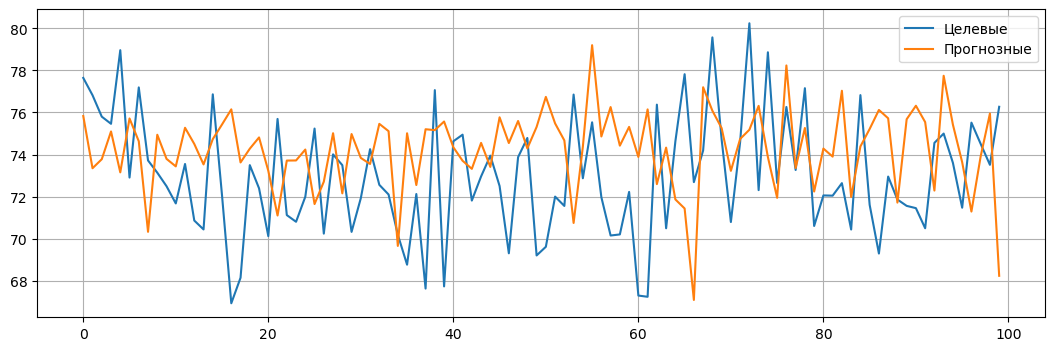

In [43]:
visual(y_1_clean_test, y_pred_gpr_1)

Мы успешно применили алгоритм `GaussianProcessRegressor`

### RandomForestRegressor

Обучим модель `RandomForestRegressor`

In [44]:
rfr_1_model = RandomForestRegressor(n_estimators=200, max_depth=2,)
rfr_1_model.fit(X_1_clean_train_sc, y_1_clean_train)
y_pred_rfr_1 = rfr_1_model.predict(X_1_clean_test_sc)

Выведим метрики модели

In [45]:
metriki(y_1_clean_test, y_pred_rfr_1, 'RandomForestRegressor')

Модель - RandomForestRegressor

RMSE, Корень из среднеквадратичной ошибки: 2.9018887321489775
MAE, Средняя абсолютная ошибка: 2.3467912175555914
MAPE, Средняя абсолютная ошибка в процентах: 3.211387833089432
R2, Коэффициент детерминации: 0.0061032475606116465
EVS, Балл объясненной дисперсии регрессии: 0.006769373468797024


Визуализируем прогнозные и тестовые целевые значения

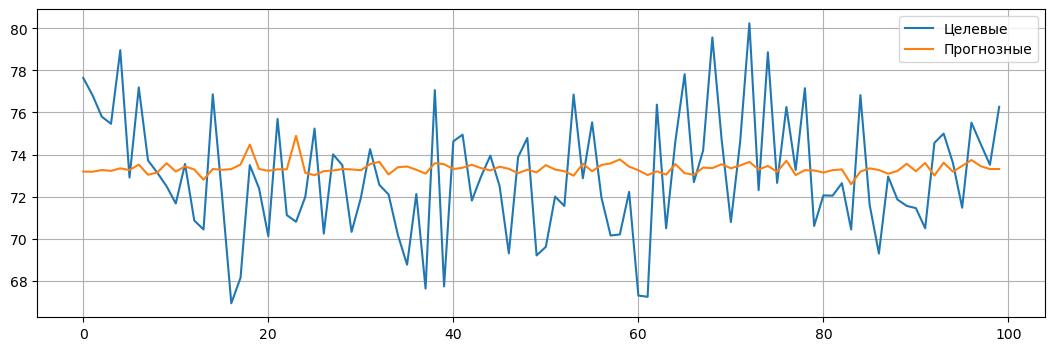

In [46]:
visual(y_1_clean_test, y_pred_rfr_1)

Мы успешно применили алгоритм `RandomForestRegressor`

### MLPR - Multi-layer Perceptron regressor

Обучим модель `MLPRegressor`

In [47]:
mlpr_1_model = MLPRegressor(hidden_layer_sizes=(100, 10), alpha=.1, batch_size=2)
mlpr_1_model.fit(X_1_clean_train_sc, y_1_clean_train)
y_pred_mlpr_1 = mlpr_1_model.predict(X_1_clean_test_sc)

Выведим метрики модели

In [48]:
metriki(y_1_clean_test, y_pred_mlpr_1, 'MLPRegressor')

Модель - MLPRegressor

RMSE, Корень из среднеквадратичной ошибки: 3.5833606644870235
MAE, Средняя абсолютная ошибка: 2.9001439401448033
MAPE, Средняя абсолютная ошибка в процентах: 3.8949866145132885
R2, Коэффициент детерминации: -0.5155169682978551
EVS, Балл объясненной дисперсии регрессии: -0.16300625460177076


Визуализируем прогнозные и тестовые целевые значения

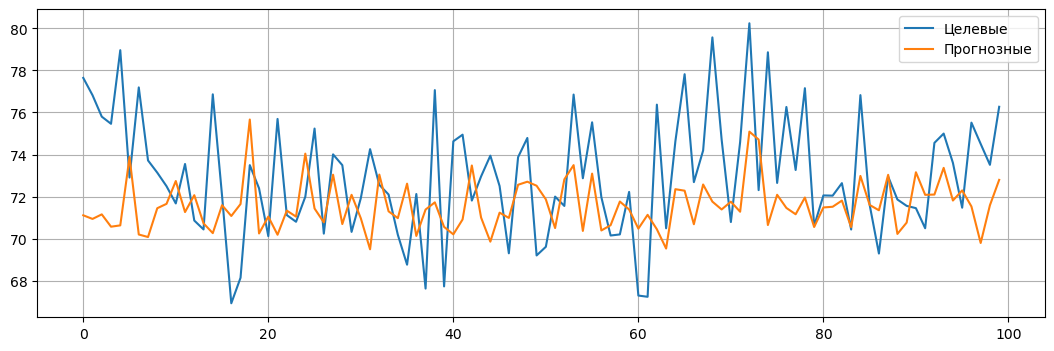

In [49]:
visual(y_1_clean_test, y_pred_mlpr_1)

Мы успешно применили алгоритм `MLPRegressor`

### Keras model neiron

Обучим модель с нейронными сетями используя библиотеку `tensorflow.keras`

Нормализуем данные

In [50]:
normalizer = Normalization(axis=-1)
normalizer.adapt(np.array(X_1_df_clean))

Создадим модель

In [51]:
model = Sequential([
    normalizer,
    Dense(26, activation='relu'),
    Dense(1)
])

model.compile(loss='mean_absolute_error',
                optimizer=Adam(0.001))

Обучим модель и сохраним ее в переменную `history`

In [52]:
history = model.fit(X_1_clean_train, y_1_clean_train, batch_size=2, epochs=150, verbose=0, validation_split = 0.2)

Выведим показатели модели

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense (Dense)               (None, 26)                338       
                                                                 
 dense_1 (Dense)             (None, 1)                 27        
                                                                 
Total params: 390
Trainable params: 365
Non-trainable params: 25
_________________________________________________________________


Выведим последние 5 эпох обучения с значениями `loss`

In [54]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss  val_loss  epoch
145  2.046645  3.041444    145
146  2.038140  3.058034    146
147  2.036784  2.977025    147
148  2.057972  2.892130    148
149  2.057430  2.977898    149

Визуализируем

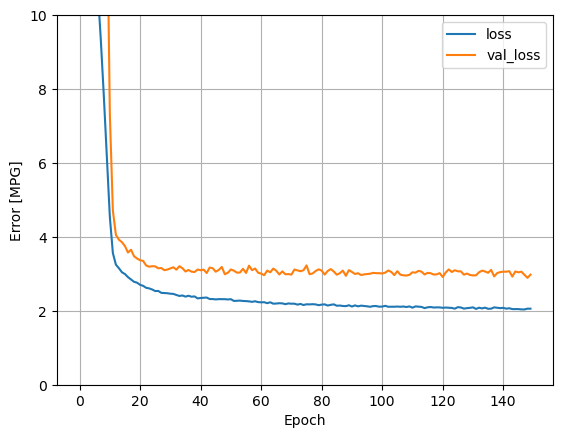

In [55]:
plot_loss(history)

Подготовим прогнозные значения модели

In [56]:
y_pred_dnn_1 = model.predict(X_1_clean_test).flatten()

6/6 [==============================] - 0s 1ms/step


Выведим метрики модели

In [57]:
metriki(y_1_clean_test, y_pred_dnn_1, 'DNN')

Модель - DNN

RMSE, Корень из среднеквадратичной ошибки: 3.436865648559687
MAE, Средняя абсолютная ошибка: 2.6982576702732555
MAPE, Средняя абсолютная ошибка в процентах: 3.6904057728699327
R2, Коэффициент детерминации: -0.39413512695599295
EVS, Балл объясненной дисперсии регрессии: -0.3940934045703557


Визуализируем прогнозные и тестовые целевые значения

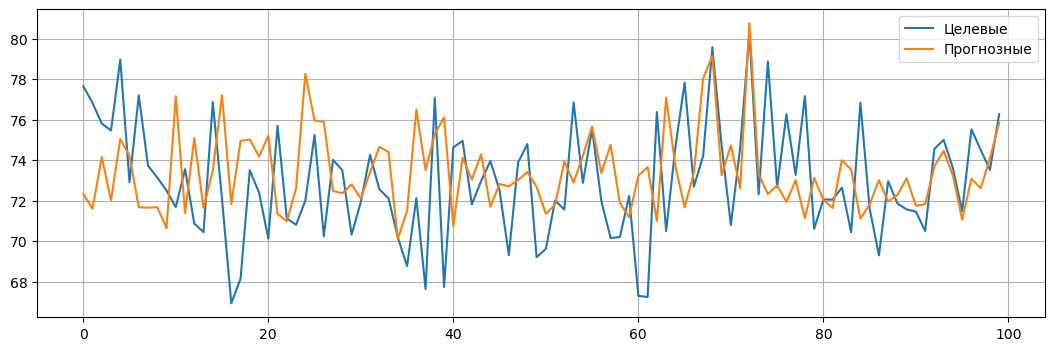

In [58]:
visual(y_1_clean_test, y_pred_dnn_1)

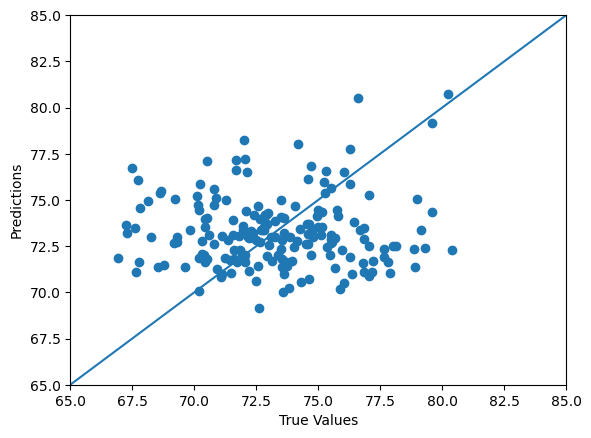

In [59]:
a = plt.axes(aspect='auto')
plt.scatter(y_1_clean_test, y_pred_dnn_1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [65, 85]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Построим гистограмму ошибок

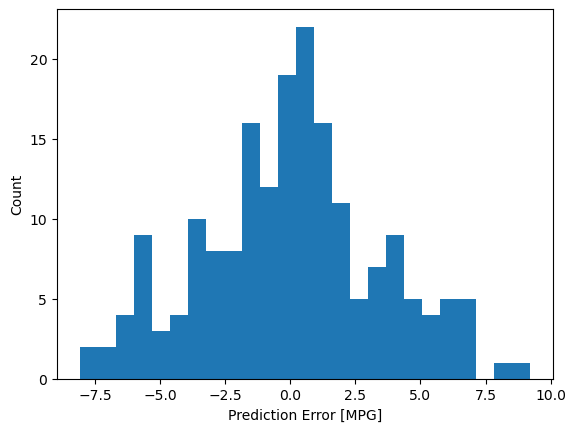

In [60]:
error = y_pred_dnn_1 - y_1_clean_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

Мы успешно применили модель нейронных сетей

### Catboost

Обучим модель `CatBoostRegressor`

In [61]:
cbr = CatBoostRegressor(verbose=0, iterations=5000, learning_rate=.01, depth=3)
cbr.fit(X_1_clean_train, y_1_clean_train, silent=True)
y_1_pred = cbr.predict(X_1_clean_test)

Выведим метрики модели

In [62]:
metriki(y_1_clean_test, y_1_pred, 'CatBoostRegressor')

Модель - CatBoostRegressor

RMSE, Корень из среднеквадратичной ошибки: 2.887383386065992
MAE, Средняя абсолютная ошибка: 2.304932618543607
MAPE, Средняя абсолютная ошибка в процентах: 3.160801635423201
R2, Коэффициент детерминации: 0.016014574858040254
EVS, Балл объясненной дисперсии регрессии: 0.022846086775741292


Визуализируем прогнозные и тестовые целевые значения

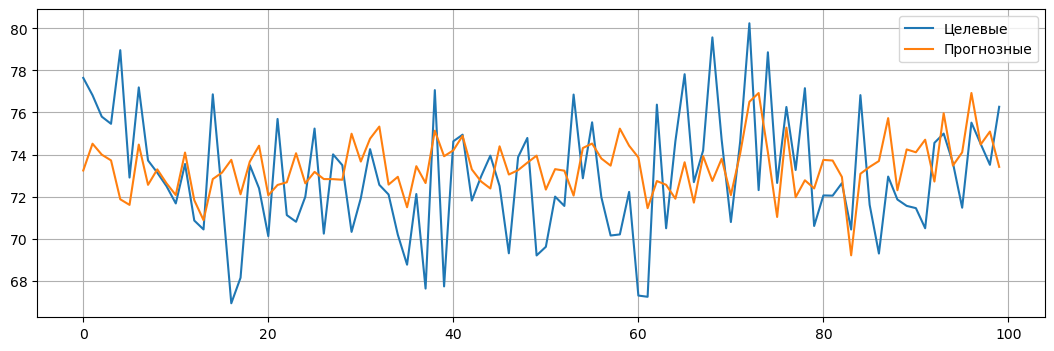

In [63]:
visual(y_1_clean_test, y_1_pred)

Мы успешно применили алгоритм `CatBoostRegressor`

### Выводы

Мы успешно, запустили и настроили 7 моделей:
- LinearRegression
- SGDRegressor
- GaussianProcessRegressor
- RandomForestRegressor
- MLPRegressor
- Keras model neiron
- CatBoostRegressor

## Выбор лучшей модели

Выведим датафрейм с метриками по всем моделям

In [64]:
df_metric = pd.DataFrame(dict_metric, index=metric_col).T.sort_values(by='RMSE, Корень из среднеквадратичной ошибки')
df_metric

RMSE, Корень из среднеквадратичной ошибки  \
CatBoostRegressor                                          2.887383   
LinearRegression                                           2.889216   
SGDRegressor                                               2.890429   
RandomForestRegressor                                      2.901889   
DNN                                                        3.436866   
MLPRegressor                                               3.583361   
GaussianProcessRegressor                                   3.618383   

                          MAE, Средняя абсолютная ошибка  \
CatBoostRegressor                               2.304933   
LinearRegression                                2.352504   
SGDRegressor                                    2.351531   
RandomForestRegressor                           2.346791   
DNN                                             2.698258   
MLPRegressor                                    2.900144   
GaussianProcessRegressor                        2.910680   

                          MAPE, Средняя абсолютная ошибка в процентах  \
CatBoostRegressor                                            3.160802   
LinearRegression                                             3.218795   
SGDRegressor                                                 3.217632   
RandomForestRegressor                                        3.211388   
DNN                                                          3.690406   
MLPRegressor                                                 3.894987   
GaussianProcessRegressor                                     4.023071   

                          R2, Коэффициент детерминации  \
CatBoostRegressor                             0.016015   
LinearRegression                              0.014765   
SGDRegressor                                  0.013938   
RandomForestRegressor                         0.006103   
DNN                                          -0.394135   
MLPRegressor                                 -0.515517   
GaussianProcessRegressor                     -0.545286   

                          EVS, Балл объясненной дисперсии регрессии  
CatBoostRegressor                                          0.022846  
LinearRegression                                           0.015088  
SGDRegressor                                               0.014335  
RandomForestRegressor                                      0.006769  
DNN                                                       -0.394093  
MLPRegressor                                              -0.163006  
GaussianProcessRegressor                                  -0.428087

Как видим из таблицы в лидерах три модели: `CatBoostRegressor`, `GaussianProcessRegressor`, `SGDRegressor`

Сохраним для приложения лучшую модель(выбераем CatBoostRegressor)

In [65]:
best_model = cbr
pickle.dump(best_model, open('best_model.pkl', 'wb'))

Загрузим для проверки лучшую модель

In [66]:
with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

Проверим загруженную модель

In [67]:
loaded_model.predict([[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

array([68.37177447])

Мы успешно сохранили лучшую модель

## Выводы

Мы успешно провели работу над прогнозированиеи конечных свойств новых материалов (композиционных материалов). В данной работе мы использовали 13 признаков и более 1000 наблюдений.

В ходе работы мы изучили основную информацию провели предобработку данных, исследование данных, моделирование, выбор лучшей модели и разработами приложение для расчета необходимых показателей.

В ходе предобработки и иследования данных, мы проверили на пропущенные значения, дубли, иследовали корреляцию признаков, проверили на выбросы и убрали там где это было необходимо, подготовили метрики для оценки алгоритмов и написали функции визуализации.

В ходе моделирования, мы успешно проверили 7 алгоритмов:
- LinearRegression
- SGDRegressor
- GaussianProcessRegressor
- RandomForestRegressor
- MLPRegressor
- Keras model neiron
- CatBoostRegressor

В ходе выбора лучшего алгоритма, было не просто выбрать, разница между алгоритмами была минимальна, в ряде случае после обновления данных, показатели немного менялись и первество аналогично менялось. Однако в итоге мы выбрали в качестве лучшей модели, базовой для приложения алгоритм `CatBoostRegressor`.